# Assignment 2

#### https://www.kaggle.com/datasets/imoore/age-dataset

Download dataset from above link, you will predict at what age person will die (Age of Death)

# Regression Assignment (End-to-End)

In [1]:
#import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt,seaborn as sns,warnings,sklearn
warnings.filterwarnings('ignore')
pd.options.display.max_rows=100

In [2]:
#Data understanding
df=pd.read_csv(r"A:\datasets\AgeDataset-V1.csv")
df.head(100)

,Id,Name,Short description,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Q23,George Washington,1st president of the United States (1732–1799),Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Q42,Douglas Adams,English writer and humorist,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Q91,Abraham Lincoln,16th president of the United States (1809-1865),Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Q254,Wolfgang Amadeus Mozart,Austrian composer of the Classical period,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,NaN,35.0
4,Q255,Ludwig van Beethoven,German classical and romantic composer,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,NaN,57.0
5,Q260,Jean-François Champollion,French classical scholar,Male,Kingdom of France; First French Empire,Egyptologist,1790,1832.0,natural causes,42.0
6,Q272,Paul Morand,French writer,Male,France,Artist,1888,1976.0,NaN,88.0
7,Q296,Claude Monet,French impressionist painter (1840-1926),Male,France,Artist,1840,1926.0,natural causes,86.0
8,Q297,Diego Velázquez,Spanish painter (1599-1660),Male,Spain,Artist,1599,1660.0,NaN,61.0
9,Q301,El Greco,"Greek painter, sculptor and architect",Male,Spain; Republic of Venice,Artist,1541,1614.0,NaN,73.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1223009 entries, 0 to 1223008
Data columns (total 10 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   Id                 1223009 non-null  object 
 1   Name               1223009 non-null  object 
 2   Short description  1155109 non-null  object 
 3   Gender             1089363 non-null  object 
 4   Country            887500 non-null   object 
 5   Occupation         1016095 non-null  object 
 6   Birth year         1223009 non-null  int64  
 7   Death year         1223008 non-null  float64
 8   Manner of death    53603 non-null    object 
 9   Age of death       1223008 non-null  float64
dtypes: float64(2), int64(1), object(7)
memory usage: 93.3+ MB


In [4]:
df.shape

(1223009, 10)

In [5]:
df.describe()

,Birth year,Death year,Age of death
count,1.223009e+06,1.223008e+06,1.223008e+06
mean,1.844972e+03,1.914246e+03,6.927406e+01
std,1.479390e+02,1.516898e+02,1.662938e+01
min,-2.700000e+03,-2.659000e+03,0.000000e+00
25%,1.828000e+03,1.895000e+03,6.000000e+01
50%,1.887000e+03,1.955000e+03,7.200000e+01
75%,1.918000e+03,1.994000e+03,8.100000e+01
max,2.016000e+03,2.021000e+03,1.690000e+02


In [6]:
for i in df.columns:
    print(i,df[i].isnull().sum()/df.shape[0],'%')

Id 0.0 %
Name 0.0 %
Short description 0.05551880648466201 %
Gender 0.10927638308467068 %
Country 0.2743307694383279 %
Occupation 0.1691843641379581 %
Birth year 0.0 %
Death year 8.176554710554051e-07 %
Manner of death 0.9561712137850171 %
Age of death 8.176554710554051e-07 %


In [7]:
df['Birth year'][df['Birth year']<1000].count()

5697

## Data Cleaning

In [8]:
print(df.shape)
df.drop('Id',inplace=True,axis=1)
print(df.shape)

(1223009, 10)
(1223009, 9)


#### Inference: Id column is completely unique therefore it doesnot contribute anything to model 

In [9]:
print(df.shape)
df.drop('Short description',inplace=True,axis=1)
print(df.shape)

(1223009, 9)
(1223009, 8)


In [10]:
num_cols=df.select_dtypes(['int64','float64']).columns
cat_cols=df.select_dtypes('object').columns
num_cols,cat_cols

(Index(['Birth year', 'Death year', 'Age of death'], dtype='object'),
 Index(['Name', 'Gender', 'Country', 'Occupation', 'Manner of death'], dtype='object'))

#### Inference: Short description column cannot be encoded further for model so its dropped

### Checking Null Columns

In [11]:
num_null_cols=[]
cat_null_cols=[]
for i in num_cols:
    if df[i].isnull().sum()>0:
        num_null_cols.append(i)
for i in cat_cols:
    if df[i].isnull().sum()>0:
        cat_null_cols.append(i)
print(num_null_cols,cat_null_cols)

['Death year', 'Age of death'] ['Gender', 'Country', 'Occupation', 'Manner of death']


### Checking Outlier Columns

In [12]:
outlier_cols=[]
for i in num_cols:
    iqr=df[i].quantile(0.75)-df[i].quantile(0.25)
    lower_range=df[i].quantile(0.25)-(1.5*iqr)
    higher_range=df[i].quantile(0.75)+(1.5*iqr)
    if df[i][df[i]<lower_range].count()>0 or df[i][df[i]>higher_range].count()>0:
        print(df[i][df[i]<lower_range].count() + df[i][df[i]>higher_range].count(),i)
        outlier_cols.append(i)
outlier_cols

104127 Birth year
99870 Death year
29353 Age of death


['Birth year', 'Death year', 'Age of death']

#### Inference: Since no. of outliers are more and for this data outlier imputaion will affect the data for model so decided not to perform outlier imputaion

### Numerical Null Imputation

In [13]:
for i in num_null_cols:
    if i in outlier_cols:
        df[i]=df[i].fillna(df[i].median())
    else:
        df[i]=df[i].fillna(df[i].mean())
for i in num_null_cols:
    if df[i].isnull().sum()>0:
        print(True)
    else:
        print(False)

False
False


### Categorical Null Imputation

In [14]:
for i in cat_null_cols:
    df[i]=df[i].fillna(df[i].mode()[0])
for i in cat_null_cols:
    if df[i].isnull().sum()>0:
        print(True)
    else:
        print(False)

False
False
False
False


# EDA 

### Univarite Analysis

In [15]:
df.columns

Index(['Name', 'Gender', 'Country', 'Occupation', 'Birth year', 'Death year',
       'Manner of death', 'Age of death'],
      dtype='object')

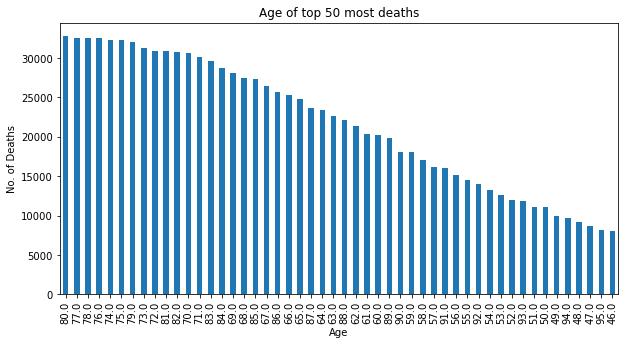

In [16]:
plt.figure(figsize=(10,5))
df['Age of death'].value_counts().nlargest(50).plot.bar()
plt.xlabel('Age')
plt.ylabel('No. of Deaths')
plt.title('Age of top 50 most deaths')
plt.show()

#### Inference: By the above graph we can see that most of the deaths take place between the age group of 70-84 as per the top 15 death counts

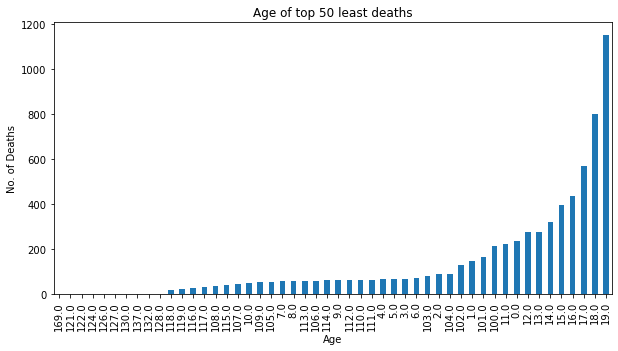

In [17]:
plt.figure(figsize=(10,5))
df['Age of death'].value_counts().nsmallest(50).plot.bar()
plt.xlabel('Age')
plt.ylabel('No. of Deaths')
plt.title('Age of top 50 least deaths')
plt.show()

#### Inference: People in the age group 12-19 face less deaths incomparison to others according to the above graph

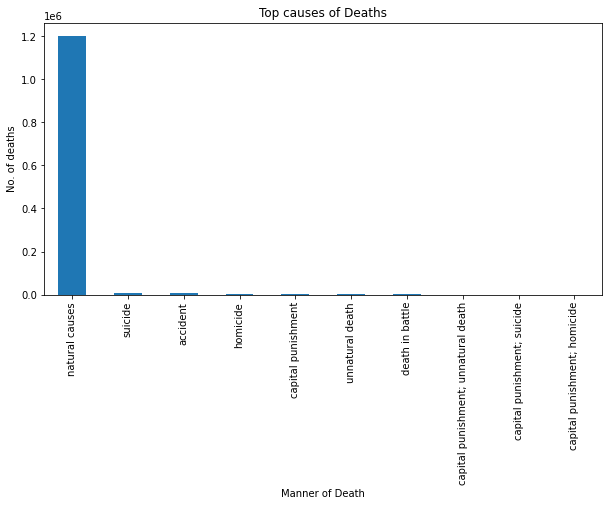

In [18]:
plt.figure(figsize=(10,5))
df['Manner of death'].value_counts().nlargest(10).plot.bar()
plt.title('Top causes of Deaths')
plt.xlabel('Manner of Death')
plt.ylabel('No. of deaths')
plt.show()

#### Inference: We can see that most of the causes of Death are Natural causes according to the above graph

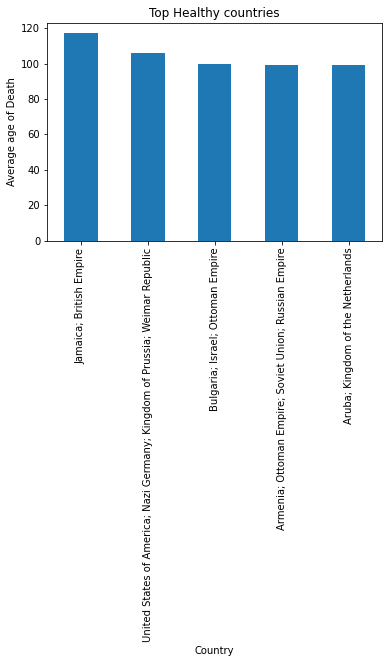

In [19]:
ex = df.groupby(['Country'])[['Age of death']].mean()
ex['Age of death'].nlargest().plot.bar()
plt.xlabel('Country')
plt.ylabel('Average age of Death')
plt.title('Top Healthy countries')
plt.show()

#### Inference: The above graph shows the top 5 countries where the average age of death is highest (Healthy countries).

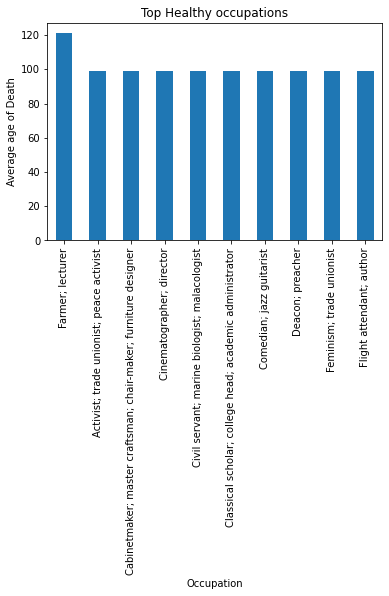

In [20]:
df['Occupation'].value_counts()
ex = df.groupby(['Occupation'])[['Age of death']].mean()
ex['Age of death'].nlargest(10).plot.bar()
plt.xlabel('Occupation')
plt.ylabel('Average age of Death')
plt.title('Top Healthy occupations')
plt.show()

#### Inference: The above graph shows the  average age of death w.r.t to occupation.

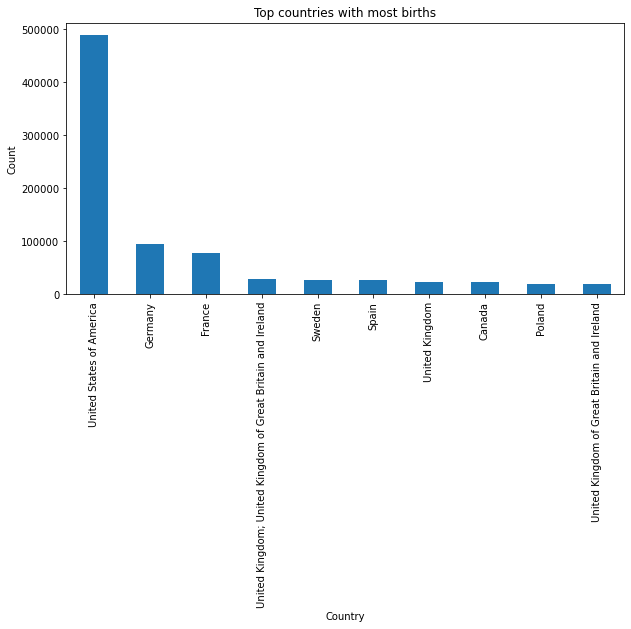

In [21]:
dff = df.groupby(['Country'])[['Birth year']].count()
plt.figure(figsize=(10,5))
dff['Birth year'].nlargest(10).plot.bar()
plt.title('Top countries with most births')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

#### Inference: Above graph shows the countries with most births.

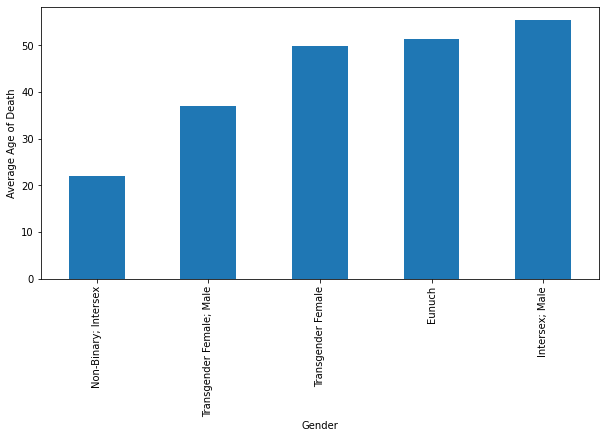

In [22]:
dff = df.groupby(['Gender'])[['Age of death']].mean()
plt.figure(figsize=(10,5))
dff['Age of death'].nsmallest().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Average Age of Death')
plt.show()

#### Inference: Above graph shows the least average age of death w.r.t to gender. 

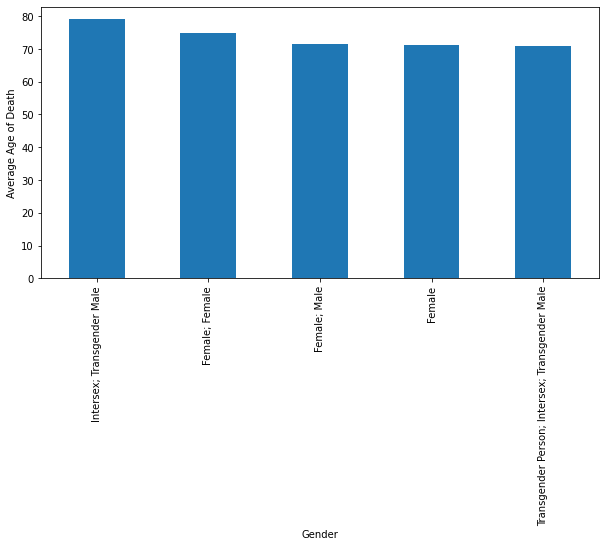

In [23]:
dff = df.groupby(['Gender'])[['Age of death']].mean()
plt.figure(figsize=(10,5))
dff['Age of death'].nlargest().plot.bar()
plt.xlabel('Gender')
plt.ylabel('Average Age of Death')
plt.show()

#### Inference: Above graph shows the top average age of death w.r.t to gender.

In [24]:
print(df.shape)
df.drop('Name',axis=1,inplace=True)
print(df.shape)

(1223009, 8)
(1223009, 7)


In [25]:
df.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,Male,United States of America; Kingdom of Great Bri...,Politician,1732,1799.0,natural causes,67.0
1,Male,United Kingdom,Artist,1952,2001.0,natural causes,49.0
2,Male,United States of America,Politician,1809,1865.0,homicide,56.0
3,Male,Archduchy of Austria; Archbishopric of Salzburg,Artist,1756,1791.0,natural causes,35.0
4,Male,Holy Roman Empire; Austrian Empire,Artist,1770,1827.0,natural causes,57.0


In [26]:
from sklearn.preprocessing import LabelEncoder

In [27]:
for i in df.select_dtypes('object').columns:
    LE = LabelEncoder()
    df[i] = LE.fit_transform(df[i])

In [28]:
df.head()

,Gender,Country,Occupation,Birth year,Death year,Manner of death,Age of death
0,9,5542,6827,1732,1799.0,137,67.0
1,9,5176,538,1952,2001.0,137,49.0
2,9,5355,6827,1809,1865.0,95,56.0
3,9,54,538,1756,1791.0,137,35.0
4,9,2169,538,1770,1827.0,137,57.0


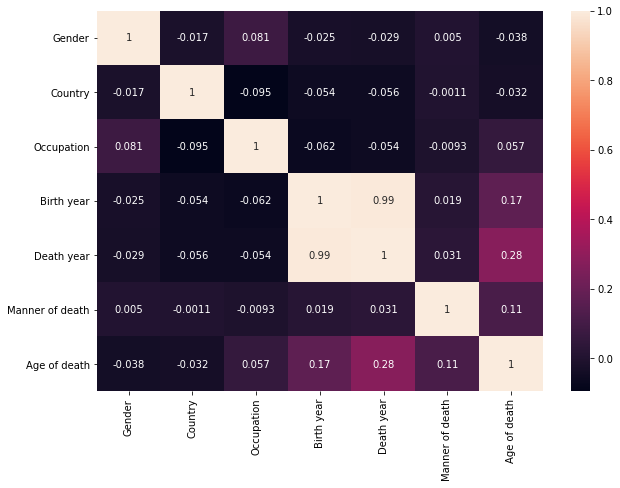

In [29]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [30]:
from sklearn.model_selection import train_test_split

x = df.drop('Age of death',axis=1)
y = df['Age of death']

x_train,x_test, y_train,  y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((856106, 6), (856106,), (366903, 6), (366903,))

# Model building

In [43]:
models=['Linear Regression','Lasso','Ridge']
r2_scoree=[]
MeanAbsoluteErrors=[]
MeanSquareErrors=[]
RootMeanSquareErrors=[]

In [44]:
def MeanAbsoluteError(prediction,y_test):
    new_df=pd.DataFrame({'prediction':prediction.tolist(), 'y_test':y_test.values.tolist()})
    new_df['result']=abs(new_df['prediction'] - new_df['y_test'])
    return new_df['result'].mean()

In [45]:
def MeanSquareError(prediction,y_test):
    new_df=pd.DataFrame({'prediction':prediction.tolist(), 'y_test':y_test.values.tolist()})
    new_df['result'] = (new_df['prediction'] - new_df['y_test'])**2
    return new_df['result'].mean()

In [46]:
def RootMeanSquareError(prediction,y_test):
    new_df=pd.DataFrame({'prediction':prediction.tolist(), 'y_test':y_test.values.tolist()})
    new_df['result'] = (new_df['prediction'] - new_df['y_test'])**2
    return (new_df['result'].mean())**0.5

In [47]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(x_train,y_train)
prediction = lr.predict(x_test)

In [48]:
r2_scoree.append(r2_score(y_test,prediction))
MeanSquareErrors.append(MeanSquareError(prediction,y_test))
MeanAbsoluteErrors.append(MeanAbsoluteError(prediction,y_test))
RootMeanSquareErrors.append(RootMeanSquareError(prediction,y_test))

In [49]:
from sklearn.linear_model import Lasso
La = Lasso()
La.fit(x_train,y_train)
prediction = La.predict(x_test)

In [50]:
r2_scoree.append(r2_score(y_test,prediction))
MeanSquareErrors.append(MeanSquareError(prediction,y_test))
MeanAbsoluteErrors.append(MeanAbsoluteError(prediction,y_test))
RootMeanSquareErrors.append(RootMeanSquareError(prediction,y_test))

In [51]:
from sklearn.linear_model import Ridge
Rg = Ridge()
Rg.fit(x_train,y_train)
prediction = Rg.predict(x_test)

In [52]:
r2_scoree.append(r2_score(y_test,prediction))
MeanSquareErrors.append(MeanSquareError(prediction,y_test))
MeanAbsoluteErrors.append(MeanAbsoluteError(prediction,y_test))
RootMeanSquareErrors.append(RootMeanSquareError(prediction,y_test))

In [53]:
r2_scoree, MeanAbsoluteErrors, MeanSquareErrors, RootMeanSquareErrors

([0.999999997185744, 0.9999420028508668, 0.9999999971848426],
 [0.0006718586001252553, 0.09955301305731616, 0.000671969302563203],
 [7.803872352848328e-07, 0.016082486589327424, 7.806371906328112e-07],
 [0.0008833952882401132, 0.12681674412051203, 0.0008835367511500647])

# Metrics

In [54]:
metric_df = pd.DataFrame({'models':models, 'r2_score':r2_scoree, 'MeanAbsoluteError':MeanAbsoluteErrors, 'MeanSquareError':MeanSquareErrors, 'RootMeanSquareErrors':RootMeanSquareErrors})
metric_df

,models,r2_score,MeanAbsoluteError,MeanSquareError,RootMeanSquareErrors
0,Linear Regression,1.000000,0.000672,7.803872e-07,0.000883
1,Lasso,0.999942,0.099553,1.608249e-02,0.126817
2,Ridge,1.000000,0.000672,7.806372e-07,0.000884


# GridSearch CV

In [ ]:
# implement grid search for the best model, recommend best hyperparameters

In [55]:
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV

In [56]:
# Cross validation
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

In [57]:
model_params = { 
    'linear':{
        'model':LinearRegression(),
        'params':{ 
            'fit_intercept':[True, False],
            'normalize':[True, False]
        }
    },    
    'ridge':{
        'model':Ridge(),
        'params':{
            'solver':['svd', 'cholesky', 'lsqr', 'sag'],
            'alpha' :[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
            'fit_intercept':[True, False],
            'normalize':[True, False]
        }
    },    
    'lasso':{
        'model':Lasso(),
        'params':{
            'alpha' :[1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1, 10, 100],
            'fit_intercept':[True, False],
            'normalize':[True, False]
        }
    }
}

In [58]:
from sklearn.model_selection import GridSearchCV

scores=[]
for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'],mp['params'], scoring='neg_mean_absolute_error', n_jobs=-1, cv=cv)
    clf.fit(x_train,y_train)
    scores.append({
        'model':model_name,
        'best_score':clf.best_score_,
        'best_params':clf.best_params_
    })

KeyboardInterrupt: 

In [ ]:
scores_df = pd.DataFrame(scores)
pd.set_option('max_colwidth', 1000)
scores_df